In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os, sys
from dotenv import load_dotenv

In [2]:
rpath = os.path.abspath(r"C:\Users\HP\Desktop\week01_telecom")
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import dataLoder
telecom_df = dataLoder()

In [3]:
telecom_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [5]:
telecom_df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [6]:
telecom_filterd = telecom_df.dropna(subset = ['MSISDN/Number'])
telecom_filterd

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.304243e+19,4/29/2019 7:28,615.0,4/30/2019 0:01,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.0,19350146.0,21293148.0,626893062.0,4735033.0,712180387.0,2457758.0,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.0,9963942.0,5065760.0,553539484.0,13394316.0,121100856.0,11314729.0,34912224.0,592786405.0


In [7]:
no_of_sessions = (telecom_filterd.groupby('MSISDN/Number')['Bearer Id']
                  .value_counts()
                  .to_frame('numberOfSessions')
                  .sort_values(by='numberOfSessions', ascending=False))


KeyboardInterrupt: 

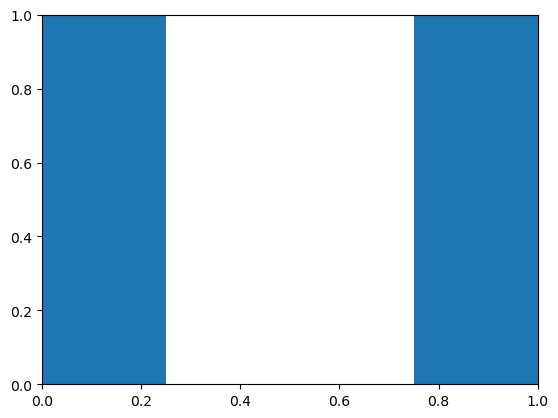

In [9]:
# Plot the total number of sessions per MSISDN
no_of_sessions.sum(axis=1).plot(kind='bar')

# Customize the plot (similar to stacked bar chart)
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Number of Sessions')
plt.title('Total Number of Sessions per MSISDN (Bar)')
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()


In [24]:
session_dur = (telecom_filterd.groupby('MSISDN/Number')['Dur. (ms)']
                  # .value_counts()
                  # .sort_values(by=['Dur. (ms)'], ascending=False)
                  )
                #   .to_frame('numberOfSessions')


In [25]:
session_dur

In [10]:
telecom_filterd[['MSISDN/Number', 'Dur. (ms)']].head(10)

,MSISDN/Number,Dur. (ms)
0,3.366496e+10,1823652.0
1,3.368185e+10,1365104.0
2,3.376063e+10,1361762.0
3,3.375034e+10,1321509.0
4,3.369980e+10,1089009.0
5,3.366819e+10,1074638.0
6,3.366537e+10,1035261.0
7,3.376349e+10,951292.0
8,3.369874e+10,941634.0
9,3.365922e+10,864482.0


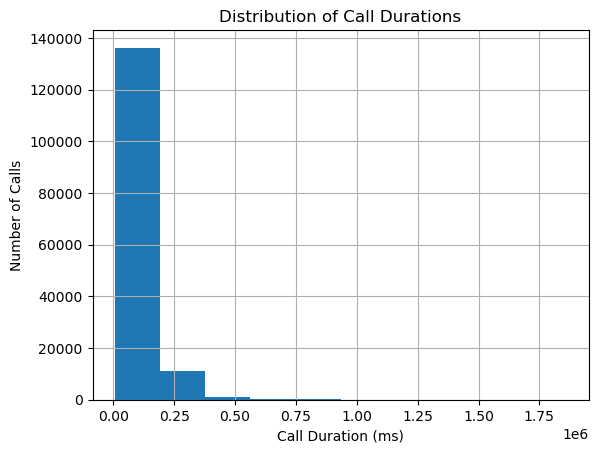

In [11]:
durations = telecom_filterd['Dur. (ms)']
plt.hist(durations)

# Customize the plot (optional)
plt.xlabel('Call Duration (ms)')
plt.ylabel('Number of Calls')
plt.title('Distribution of Call Durations')
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()

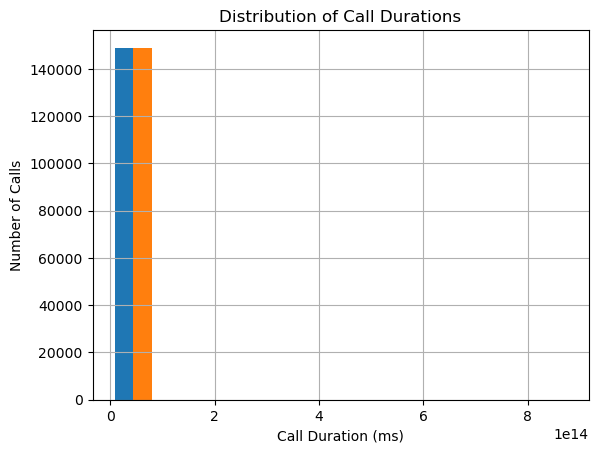

In [12]:
durations_per_number = telecom_filterd[['MSISDN/Number', 'Dur. (ms)']]
plt.hist(durations_per_number)

# Customize the plot (optional)
plt.xlabel('Call Duration (ms)')
plt.ylabel('Number of Calls')
plt.title('Distribution of Call Durations')
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()

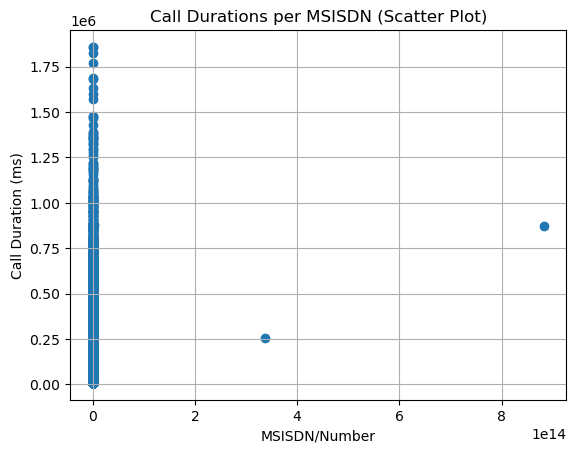

In [13]:
import matplotlib.pyplot as plt
import pandas as pd  # Assuming you have pandas imported for telecom_filterd

# Assuming telecom_filterd has 'MSISDN/Number' and 'Dur. (ms)' columns

# Extract data
msisdns = telecom_filterd['MSISDN/Number']
durations = telecom_filterd['Dur. (ms)']

# Create the scatter plot
plt.scatter(msisdns, durations)

# Customize the plot (optional)
plt.xlabel('MSISDN/Number')
plt.ylabel('Call Duration (ms)')
plt.title('Call Durations per MSISDN (Scatter Plot)')
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.show()


In [14]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

KeyboardInterrupt: 

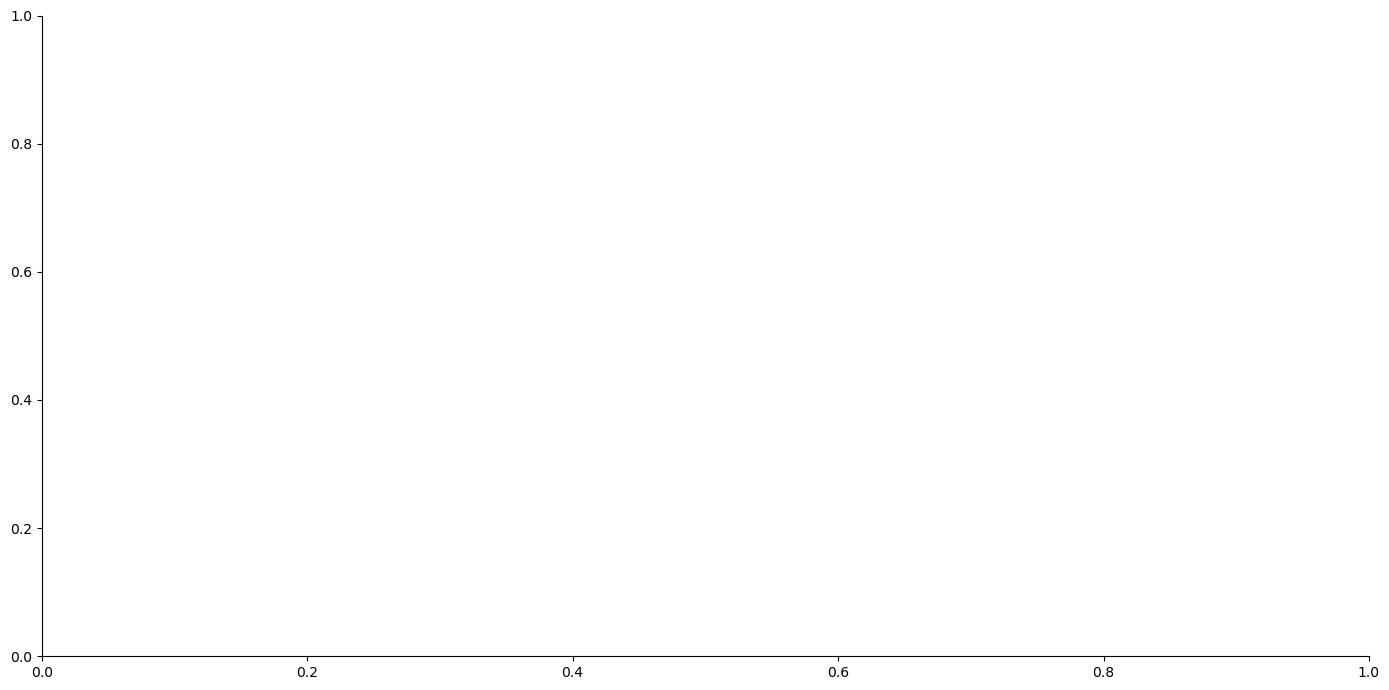

In [15]:
plot_hist(telecom_filterd, 'MSISDN/Number', 'Dur. (ms)')

In [5]:
telecom_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [10]:
import pandas as pd

# Assuming your DataFrame is called 'telecom_df'

# Select relevant columns
relevant_columns = ['MSISDN/Number', 'Bearer Id', 'Start', 'End', 'Dur. (ms)',
                    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)',
                    'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
                    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
                    'Other UL (Bytes)','Total UL (Bytes)', 'Total DL (Bytes)']
user_data = telecom_df[relevant_columns]

# Group by user (MSISDN) and calculate desired metrics
user_behavior = user_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'nunique',  # Number of xDR sessions (unique Bearer Ids)
    'Dur. (ms)': 'sum',  # Total session duration
    **{app + ' DL (Bytes)': 'sum' for app in ['HTTP', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']},  # Total download per application
    **{app + ' UL (Bytes)': 'sum' for app in ['HTTP', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']},  # Total upload per application
    'Total DL (Bytes)': lambda x: x.filter(like=' DL').sum(),  # Total download volume
    'Total UL (Bytes)': lambda x: x.filter(like=' UL').sum()   # Total upload volume
})

# Reset index to move 'MSISDN/Number' from row index to a column
user_behavior = user_behavior.reset_index()

print(user_behavior)


        MSISDN/Number  Bearer Id  Dur. (ms)  HTTP DL (Bytes)  \
0        3.360100e+10          1   116720.0              0.0   
1        3.360100e+10          1   181230.0              0.0   
2        3.360100e+10          1   134969.0              0.0   
3        3.360101e+10          1    49878.0           8749.0   
4        3.360101e+10          2    37104.0      185208098.0   
...               ...        ...        ...              ...   
106851   3.379000e+10          1     8810.0         642945.0   
106852   3.379000e+10          1   140988.0              0.0   
106853   3.197021e+12          1   877385.0              0.0   
106854   3.370000e+14          1   253030.0              0.0   
106855   8.823971e+14          1   869844.0              0.0   

        Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
0                     2206504.0          3337123.0          837400.0   
1                     2598548.0          4197697.0         2828821.0   
2              

In [11]:
pd.DataFrame(user_behavior).tail(20)

,MSISDN/Number,Bearer Id,Dur. (ms),HTTP DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),...,HTTP UL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
106836,3.378988e+10,1,159795.0,0.0,1526572.0,2638795.0,3183125.0,11853479.0,15490470.0,6.795634e+08,...,0.0,19566.0,3921693.0,830171.0,9529629.0,11892639.0,3399169.0,5128367.0,0.0,0.0
106837,3.378988e+10,1,175746.0,0.0,732065.0,3346908.0,1313311.0,17992503.0,2851750.0,2.493450e+07,...,0.0,24279.0,2510633.0,350089.0,15807513.0,9116407.0,1590238.0,11155179.0,0.0,0.0
106838,3.378988e+10,4,702234.0,2180655.0,7086852.0,27896243.0,8126457.0,35075895.0,45554753.0,1.589840e+09,...,160309.0,79679.0,9217481.0,623318.0,51892420.0,43274336.0,26394257.0,24100303.0,0.0,0.0
106839,3.378989e+10,1,135558.0,0.0,1893104.0,9405883.0,3505323.0,6841008.0,3981448.0,4.432691e+08,...,0.0,53422.0,2044174.0,554520.0,454915.0,20977833.0,3599468.0,9067857.0,0.0,0.0
106840,3.378989e+10,1,173035.0,0.0,221459.0,3601559.0,836987.0,18317934.0,16333875.0,7.579245e+08,...,0.0,5678.0,383698.0,169368.0,8891382.0,21899214.0,16471991.0,7881716.0,0.0,0.0
106841,3.378991e+10,1,44199.0,2709106.0,3489622.0,11076131.0,2988025.0,4706637.0,19410574.0,8.212614e+08,...,492006.0,9389.0,3501022.0,454772.0,3138196.0,11378309.0,8110342.0,12563994.0,0.0,0.0
106842,3.378991e+10,1,86399.0,545882.0,19911.0,7192559.0,271669.0,9443529.0,15019468.0,2.907074e+08,...,29872.0,50262.0,3697493.0,8892.0,16299116.0,3134278.0,15141121.0,5103478.0,0.0,0.0
106843,3.378991e+10,1,98294.0,0.0,916321.0,10140885.0,2907839.0,4976805.0,20923570.0,4.428094e+08,...,0.0,58329.0,40439.0,17627.0,12921556.0,9049030.0,15547827.0,13757241.0,0.0,0.0
106844,3.378992e+10,1,54339.0,19414936.0,2362158.0,8926384.0,329964.0,4765077.0,6782568.0,5.199209e+08,...,738403.0,42044.0,2976470.0,277638.0,2782265.0,21772029.0,2579929.0,3306934.0,0.0,0.0
106845,3.378994e+10,1,36812.0,141333369.0,1405120.0,102513.0,821911.0,20373367.0,8788458.0,1.182722e+08,...,2557570.0,32287.0,2530052.0,853341.0,21986509.0,7794549.0,9861261.0,1095661.0,0.0,0.0
